# Model

In [1]:
#Librarys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sys
sys.path.append('../')
from helper.lazy_regression import TooLazyForRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data
df_mpa = pd.read_table('../data/data_mpa.txt', sep=' ')
df_spg = pd.read_table('../data/data_spg.txt', sep=' ')
df_sps = pd.read_table('../data/data_sps.txt', sep=' ')

## 1. MPA

In [3]:
data = df_mpa
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(df=train)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 15/15 [06:16<00:00, 25.11s/it]


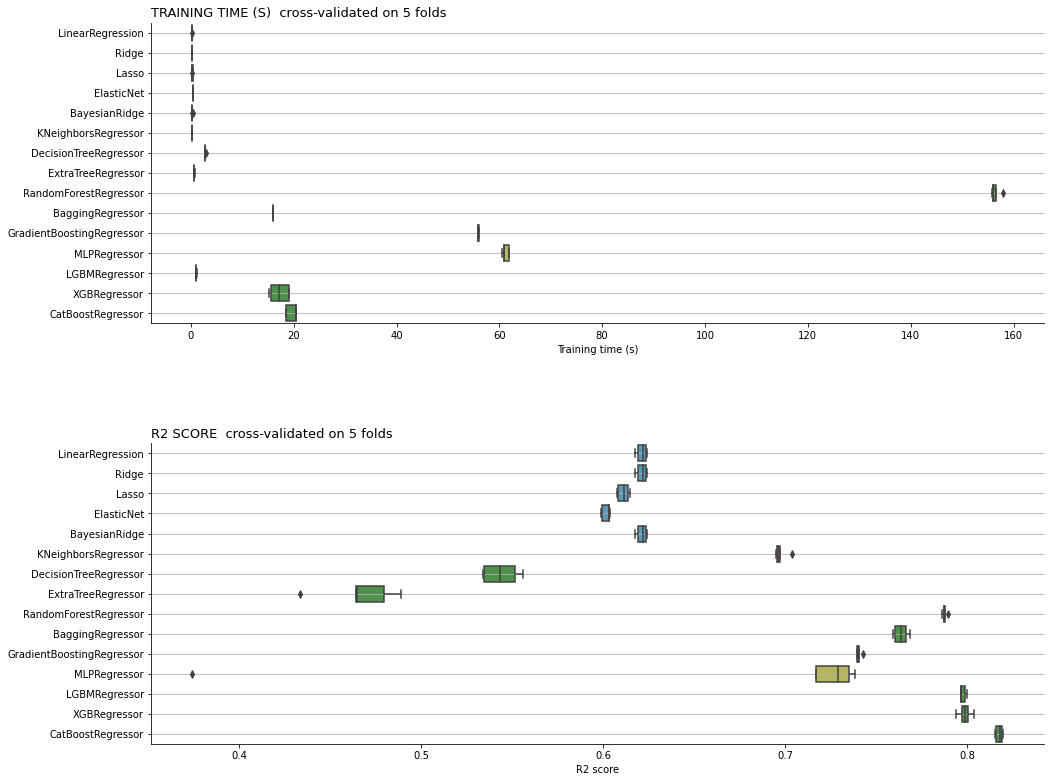

In [4]:
lazy.plot_report(plot_include_time=True,plot_include_mae = False)

## 2. SPG

In [5]:
data = df_spg
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(df=train)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 15/15 [02:16<00:00,  9.11s/it]


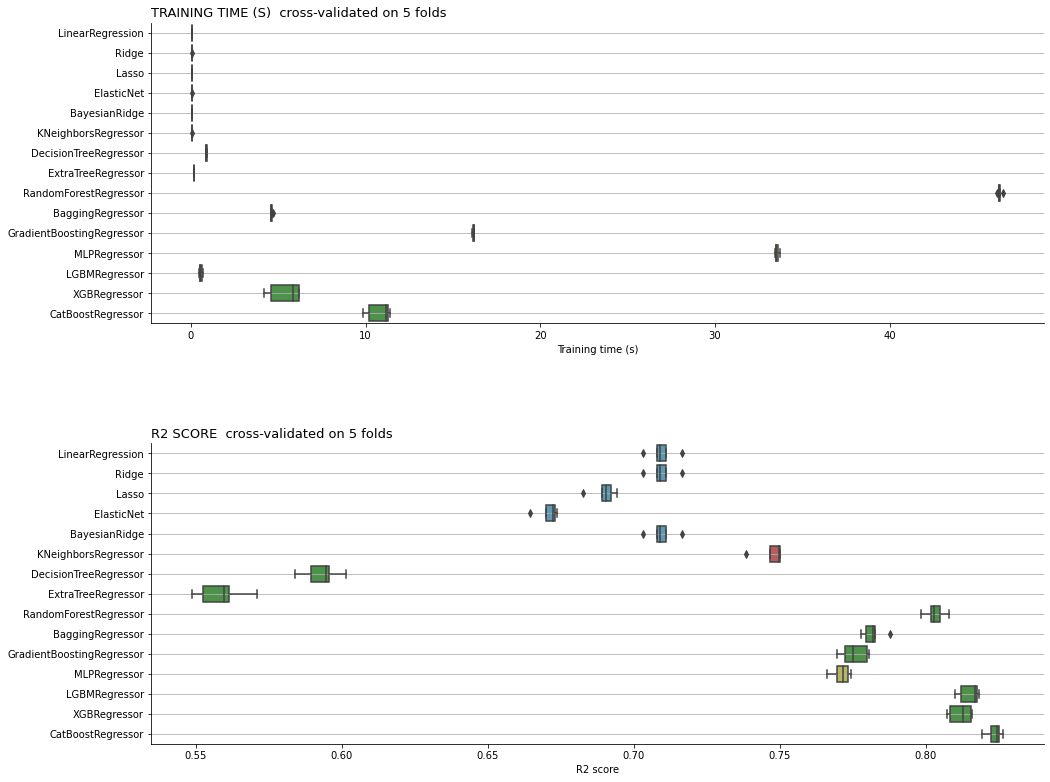

In [6]:
lazy.plot_report(plot_include_time=True,plot_include_mae = False)

## 3. SPS

In [7]:
data = df_sps
feature_cols = data.columns.to_list()
feature_cols.remove('size_mm')
feature_cols.remove('start_time')
train, test = train_test_split(data, test_size=.1)
lazy = TooLazyForRegression(save_path='lazy_report.json',
                            target_col='size_mm', feature_cols=feature_cols,fit_model_class='all',
                            sample_size='all', cross_val_splits=5, n_threads=5,
                            save_estimator=True)
lazy.generate_report(df=train)

Fitting CatBoostRegressor: 100%|███████████████████████████████████████████████████████| 15/15 [00:46<00:00,  3.09s/it]


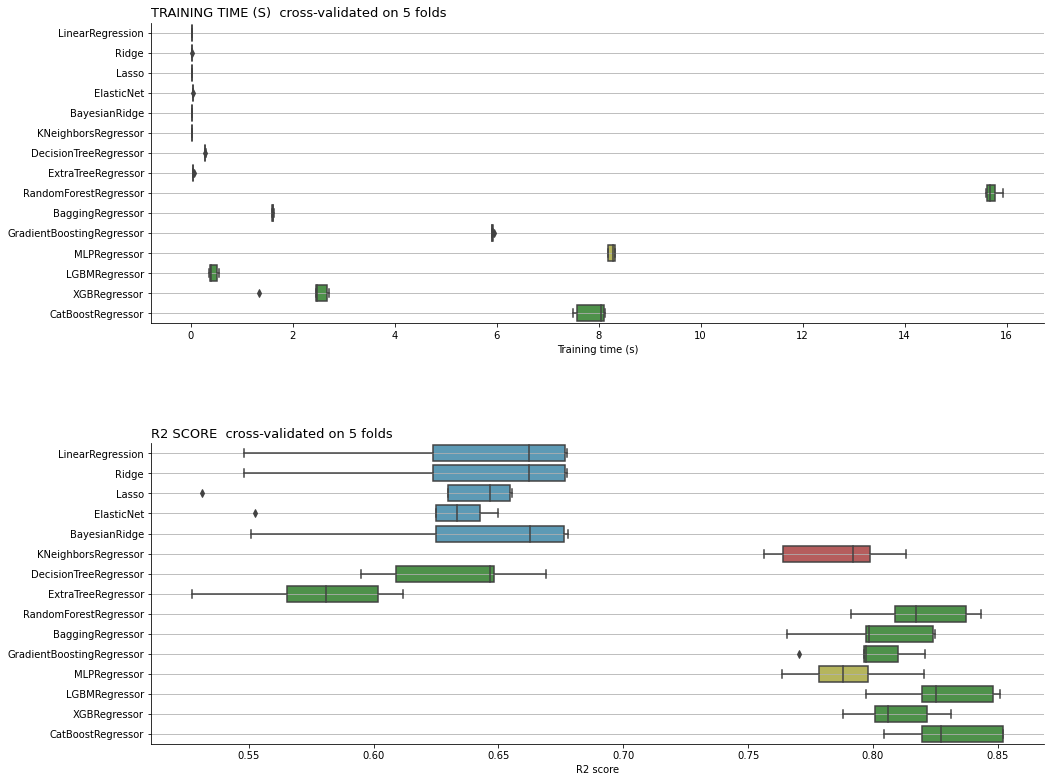

In [8]:
lazy.plot_report(plot_include_time=True,plot_include_mae = False)

Color-Palette:
- linear = blue
- tree = green
- neighbor = red
- neuronal = yellow

## XGB Regession Test SPS

In [39]:
# Train Test Split of Dataframe
df_xgb = df_sps.drop(['start_time'], axis=1)
X, y = df_xgb.drop(['size_mm'], axis=1), df_xgb['size_mm']
y =y.astype(np.str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 102)

In [40]:
# Transform y to normal distribution 
#y_train = np.log1p(y_train)
model= xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# make predictions for test data
y_pred = model.predict(X_test)
print('R2-Score: ', model.score(X_test, y_test))

R2-Score:  0.8864160590439585


## CatB Regession Test MPA

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train)

In [ ]:
# Get predictions
y_pred = model.predict(X_test)
print('R2-Score: ', model.score(X_train, y_train))

In [ ]:
# important code for later:

In [ ]:
def hyperParameterTuning_RandomizedSearchCV(X, y):
    random_grid = {
        'alpha':np.arange(0.1,1.5,0.1),
        'max_iter':np.arange(500,3000,50),
        'tol':np.arange(0.0001,0.0009,0.0001),
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'precompute': [True, False],
        'copy_X': [True, False],
        'warm_start': [True, False],
        'positive': [True, False],
        'selection' : ['cyclic', 'random']
        
    }


    random_search = RandomizedSearchCV(estimator=Lasso(),
                                      param_distributions=random_grid,
                                      cv=5, verbose=10, n_iter=100, n_jobs=-1)
    random_search.fit(X,y)
    return print(random_search.best_params_,"\n",random_search.best_score_)

In [ ]:
def hyperParameterTuning_GridSearchCV(X, y):
    random_grid = {
        'fit_intercept': [False,True],
        'normalize': [False,True],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    }


    random_search = GridSearchCV(estimator=Ridge(),
                                      param_grid=random_grid,
                                      cv=5, verbose=10, n_jobs=-1)
    random_search.fit(X,y)
    return print(random_search.best_params_,"\n",random_search.best_score_)